# CLUB algorithm draft - Online Clustering of Bandits

Antoine GRELETY

Vincent LE MEUR

In [29]:
import numpy as np
import numpy.random as npr
import numpy.linalg
import pandas as pd
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
%load_ext autoreload
%autoreload 2
import online_cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
n_user=60
n_cluster=7
T=55000
D=5
c=5
Online =online_cluster.OLCB(T=T,n_user=n_user,n_cluster=n_cluster,D=D,c=3,graph_density=3*int(np.log(n_user)*n_user))
Online_UCB_IND =online_cluster.OLCB(T=T,n_user=n_user,n_cluster=n_cluster,D=D,c=c,graph_density=1)

On représente tous les n_users :

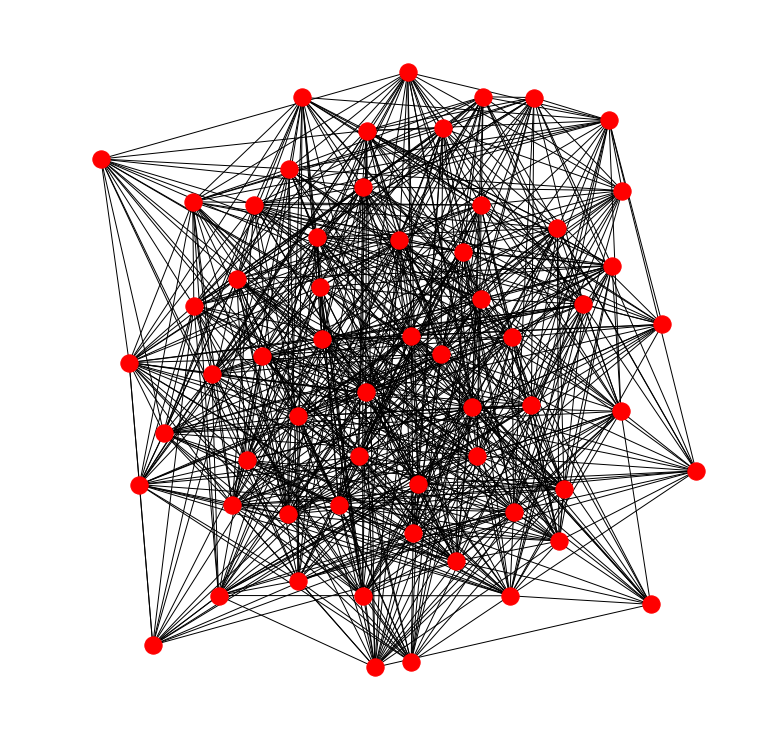

In [32]:
plt.figure(figsize=(10,10))
nx.draw(Online.V)
plt.show()
#plt.savefig('graphe_initial.png')

In [33]:
#paramètrage des algorithmes
sigma=0.3
alpha=5
alpha2=1
z=0
method = "fixed design"

#### Algorithme CLUB

In [ ]:
list_m, list_CB, list_omega, list_payoff, list_random_payoff, regret_cum, regret_cum_random, V = Online.CLUB(sigma=sigma,alpha=alpha,alpha2=alpha2,z=z,method=method)

#### Algorithme LINUCB_IND 

In [ ]:
list_payoff_Lin,regret_cum_Lin,regret_cum_random_Lin = Online.LinUCB_IND(sigma=sigma,alpha=alpha,method=method)

Regardons l'évolution du nombre de Cluster au fur et à mesure des ittérations :

In [ ]:
fig = plt.figure()
plt.plot(list_m)
plt.title("Evolution du nombre de cluster")
plt.show()
#plt.savefig('nombre_clusters_evol.png')

Observons l'évolution des Confidence Bound :

In [ ]:
plt.figure()
plt.plot(list_CB)
plt.title("Evolution des Confidence Bound sur les 10k premières itérations")
plt.xlim(0,10000)
plt.show()
#plt.savefig('CB_evol.png')

Observons l'évolution de la payoff cumulée en fonction des ittérations :

In [ ]:
plt.figure()
plt.plot(Online.payoff_cum(list_payoff)[1000:Online.T])
plt.plot(Online.payoff_cum(list_payoff_Lin)[1000:Online.T])
plt.title("Evolution de la payoff cumulée")
plt.legend(["CLUB","LinUCB_IND"])
plt.show()
#plt.savefig('payoff_cumul.png')

Observons enfin le regret cumulé associé : 

In [ ]:
#plt.plot(-regret_cum_random)
plt.figure()
plt.plot(regret_cum/regret_cum_random)
plt.plot(regret_cum_Lin/regret_cum_random_Lin)
plt.legend(["CLUB","LinUCB_IND"])
plt.xlim(1000,)
plt.ylim(0,1)
plt.xlabel("itérations")
plt.ylabel("regret cumulé relatif")
plt.title("Evolution du regret cumulé relatif au cas aléatoire")
plt.show()
plt.savefig('regret_cumul.png')

Les nouveux clusters sont :

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(V)
plt.show()